# Tensor 学习

## 创建
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/5d9273db0477677da5f5d91d13e2c96c.png)

In [1]:
import torch


In [2]:
x=torch.tensor([1,2])
y=torch.tensor([3,4])
z=x.add(y)

In [3]:
x,y,z

(tensor([1, 2]), tensor([3, 4]), tensor([4, 6]))

In [4]:
x.add_(y)

tensor([4, 6])

可以看到的是x在进行add操作后是没有改变的,如果要使值改变需要使用x.add_()

In [6]:
#根据list数据生成tensor
torch.Tensor([1,2,3,4,5,6])

tensor([1., 2., 3., 4., 5., 6.])

In [9]:
#根据指定形状生成tensor
torch.Tensor(2,3)

tensor([[4.2934e-08, 1.0499e-08, 1.6985e+22],
        [3.3207e-09, 3.3709e-06, 2.6941e+23]])

In [11]:
#根据给定的tensor的形状
t=torch.Tensor([[1,2,3],[4,5,6]])
t

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [12]:
#查看tensor的形状
t.size()

torch.Size([2, 3])

In [13]:
#shape与size()等价方式
t.shape

torch.Size([2, 3])

In [19]:
#根据已有形状创建tensor
torch.Tensor(t.size())
# 生成的结果是随机的

tensor([[1.3107e-08, 7.9873e+20, 4.1960e-08],
        [2.1863e+23, 4.1245e-11, 7.1450e+31]])

In [20]:
t1=torch.Tensor(1)
t2=torch.tensor(1)
print("t1的值{},t1的数据类型{}".format(t1,t1.type()))
print("t2的值{},t2的数据类型{}".format(t2,t2.type()))

t1的值tensor([1.4013e-45]),t1的数据类型torch.FloatTensor
t2的值1,t2的数据类型torch.LongTensor


Tensor是一个生成张量的函数，默认传入的是一个大小，自动生成一个size的tensor，tensor里的数据类型默认float
而tensor是默认输入的值为创建tensor的值，自动判断其类型，生成一个tensor

## 生成特定tensor 

In [22]:
#生成一个单位矩阵
torch.eye(2,2)

tensor([[1., 0.],
        [0., 1.]])

In [23]:
#自动生成全是0的矩阵
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [24]:
#根据规则生成数据1~10之间的4个数
torch.linspace(1,10,4)

tensor([ 1.,  4.,  7., 10.])

In [25]:
#生成满足均匀分布随机数
torch.rand(2,3)

tensor([[0.8662, 0.3090, 0.0922],
        [0.3363, 0.9156, 0.4157]])

In [26]:
#生成满足标准分布随机数
torch.randn(2,3)

tensor([[-1.5119,  0.5444, -0.7975],
        [-1.0350,  0.2358,  0.4778]])

In [27]:
#返回所给数据形状相同，值全为0的张量
torch.zeros_like(torch.rand(2,3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

## 改变形状
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/b78a5eb320ca85865498ef331663acd6.png)

In [29]:
#生成一个形状为2x3的矩阵
x = torch.randn(2, 3)
#查看矩阵的形状
x.size()   #结果为torch.Size([2, 3])

torch.Size([2, 3])

In [30]:
#查看x的维度
x.dim()    #结果为2

2

In [34]:
#把x变为3x2的矩阵
x.view(3,2)

tensor([[ 0.0580,  0.1934],
        [-0.2943, -0.2764],
        [ 1.9054,  1.1999]])

In [36]:
#把x展平为1维向量
y=x.view(-1)  
y

tensor([ 0.0580,  0.1934, -0.2943, -0.2764,  1.9054,  1.1999])

In [37]:
y.shape# 1x6的tensor

torch.Size([6])

In [38]:
y.size()

torch.Size([6])

size()和shape是一样的效果

In [42]:
#添加一个维度
z=torch.unsqueeze(y,0)
#查看z的形状
z.size()   #结果为torch.Size([1, 6])

torch.Size([1, 6])

In [43]:
z

tensor([[ 0.0580,  0.1934, -0.2943, -0.2764,  1.9054,  1.1999]])

可以看到的是tensor中多了一层[]即增加了一个维度，可以试一下在增加一个维度看看，会发现有多了一层[]

In [53]:
z = torch.unsqueeze(y,1)
z

tensor([[ 0.0580],
        [ 0.1934],
        [-0.2943],
        [-0.2764],
        [ 1.9054],
        [ 1.1999]])

In [54]:
z.dim()

2

In [55]:
y.dim()

1

如果后一个参数写成1的话，发现y首先被拆分成了一个个tensor后又组成了一个维度加一的tensor

In [56]:
#查看z的形状
z.size()

torch.Size([6, 1])

In [57]:
#计算Z的元素个数
z.numel()   #结果为6

6

## 索引操作
Tensor的索引操作与Numpy类似，一般情况下索引结果与源数据共享内存。从tensor获取元素除了可以通过索引，也可借助一些函数
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/ca5b6ebfbff3968e030d3c7b92c445f0.png)

In [61]:
#设置一个随机种子
torch.manual_seed(100) 
#生成一个形状为2x3的矩阵
x = torch.randn(2, 3)
x

tensor([[ 0.3607, -0.2859, -0.3938],
        [ 0.2429, -1.3833, -2.3134]])

In [62]:
#根据索引获取第1行，所有数据
x[0,:]

tensor([ 0.3607, -0.2859, -0.3938])

In [63]:
#获取最后一列数据
x[:,-1]

tensor([-0.3938, -2.3134])

In [64]:
#生成是否大于0的Byter张量
mask=x>0
#获取大于0的值
torch.masked_select(x,mask)

tensor([0.3607, 0.2429])

In [66]:
#获取非0值的下标,即行，列索引
torch.nonzero(mask)

tensor([[0, 0],
        [1, 0]])

In [76]:
x.dim()

2

gather(input,dim,index),input是一个tensor，dim是待操作数的维度，index就是对应操作维度上的下标

获取指定索引对应的值,输出根据以下规则得到

 out[i][j][k] = input[index[i][j][k]][j][k]  # if dim == 0
 
 out[i][j][k] = input[i][index[i][j][k]][k]  # if dim == 1
 
 out[i][j][k] = input[i][j][index[i][j][k]]  # if dim == 2

以下面代码为例;
output的格式和index是一样的:

output[0][0]=input[index[0][0]][0]=iput[0][0]=0.3607

output[0][1]=input[index[0][1]][1]=input[1][1]=-1.3833

output[0][2]=input[index[0][2]][2]=input[1][2]=-2.3134

In [80]:
#获取指定索引对应的值,输出根据以下规则得到
# out[i][j][k] = input[index[i][j][k]][j][k]  # if dim == 0
# out[i][j][k] = input[i][index[i][j][k]][k]  # if dim == 1
# out[i][j][k] = input[i][j][index[i][j][k]]  # if dim == 2
index=torch.LongTensor([[0,1,1]])
index

tensor([[0, 1, 1]])

In [69]:
torch.gather(x,0,index)

tensor([[ 0.3607, -1.3833, -2.3134]])

In [81]:
index=torch.LongTensor([[0,1,1],[1,1,1]])
a=torch.gather(x,1,index)
a

tensor([[ 0.3607, -0.2859, -0.2859],
        [-1.3833, -1.3833, -1.3833]])

out[0][0]=input[0][index[0][0]]=input[0][0]=0.3607

out[0][1]=input[0][index[0][1]]=input[0][1]=-0.2859

那么gather到底有啥好处呢？我的理解是这样的对于input的tensor，我们可以确定需要操作的维数，即只取该维度上的数据，而index帮助确定该维度的数据，不用使用循环，减少了麻烦。

In [84]:
#把a的值返回到一个2x3的0矩阵中
z=torch.zeros(2,3)
z

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [85]:
z.scatter_(1,index,a)

tensor([[ 0.3607, -0.2859,  0.0000],
        [ 0.0000, -1.3833,  0.0000]])

scatter的操作方法

self[ index[i][j][k] ][ j ][ k ] = src[i][j][k]  # if dim == 0

self[ i ][ index[i][j][k] ][ k ] = src[i][j][k]  # if dim == 1

self[ i ][ j ][ index[i][j][k] ] = src[i][j][k]  # if dim == 2

以上题为例：

z[0][index[0][0]] = z[0][0] = a[0][0]=0.3607

z[0][index[0][1]] = z[0][1] = a[0][1]=-0.2859

.............

## 广播机制

In [2]:
import numpy as np

In [88]:
A = np.arange(0, 40,10).reshape(4, 1)
B = np.arange(0, 3)
#把ndarray转换为Tensor
A1=torch.from_numpy(A)  #形状为4x1
B1=torch.from_numpy(B)  #形状为3
#Tensor自动实现广播
C=A1+B1
C

tensor([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]], dtype=torch.int32)

In [95]:
#我们可以根据广播机制，手工进行配置
#根据规则1，B1需要向A1看齐，把B变为（1,3）
B2=B1.unsqueeze(0)  #B2的形状为1x3
#使用expand函数重复数组，分别的4x3的矩阵
A2=A1.expand(4,3)
B3=B2.expand(4,3)
#然后进行相加,C1与C结果一致
C1=A2+B3
C1

tensor([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]], dtype=torch.int32)

## 逐元素操作
与Numpy一样，tensor也有逐元素操作（element-wise），操作内容相似，但使用函数可能不尽相同。大部分数学运算都属于逐元操作，逐元素操作输入与输出的形状相同
![jupyte](http://www.feiguyunai.com/wp-content/uploads/2019/09/3fbded1e5a9c9c5330566b41cf6f20fd.png)

In [97]:
t = torch.randn(1, 3)
t1 = torch.randn(3, 1)
t2 = torch.randn(1, 3)
#t+0.1*(t1/t2)
torch.addcdiv(t, 0.1, t1, t2)

tensor([[-0.3861, -0.1857,  0.6969],
        [-0.3915, -0.1830,  0.7061],
        [-0.1649, -0.2989,  0.3154]])

In [98]:
#计算sigmoid
torch.sigmoid(t)

tensor([[0.4357, 0.4376, 0.6170]])

In [99]:
#将t限制在[0,1]之间
torch.clamp(t,0,1)

tensor([[0.0000, 0.0000, 0.4770]])

In [100]:
#t+2进行就地运算
t.add_(2)

tensor([[1.7414, 1.7490, 2.4770]])

In [105]:
t = torch.Tensor([[1,2,3,4],[5,6,7,8]])

In [114]:
torch.sqrt(t)

tensor([[1.0000, 1.4142, 1.7321, 2.0000],
        [2.2361, 2.4495, 2.6458, 2.8284]])

## 归并操作
归并操作顾名思义，就是对输入进行归并或合计等操作，这类操作的输入输出形状一般不相同，而且往往是输入大于输出形状。归并操作可以对整个tensor，也可以沿着某个维度进行归并

归并操作一般涉及一个dim参数，指定沿哪个维进行归并。另一个参数是keepdim，说明输出结果中是否保留维度1，缺省情况是False，即不保留。
以下为归并操作的部分代码
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/625f6b4e0a1446f77392fc93a847f5a1.png)

In [116]:
#生成一个含6个数的向量
a=torch.linspace(0,10,6)
#使用view方法，把a变为2x3矩阵
a=a.view((2,3))
#沿y轴方向累加，即dim=0
b=a.sum(dim=0)   #b的形状为[3]
b

tensor([ 6., 10., 14.])

In [119]:
#沿y轴方向累加，即dim=0,并保留含1的维度
b=a.sum(dim=0,keepdim=True) #b的形状为[1,3]
b

tensor([[ 6., 10., 14.]])

## 比较操作
比较操作一般进行逐元素比较，有些是按指定方向比较。
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/c8d86d5a90943e7be3ecc22885bb28f0.png)

In [120]:
x=torch.linspace(0,10,6).view(2,3)

In [121]:
x

tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

In [122]:
#求所有元素的最大值
max = torch.max(x)   #结果为10
#求y轴方向的最大值
max1 = torch.max(x,dim=0)  #结果为[6,8,10]
#求最大的2个元素
max2 = torch.topk(x,1,dim=0)  #结果为[6,8,10],对应索引为tensor([[1, 1, 1]
max,max1,max2

(tensor(10.),
 torch.return_types.max(
 values=tensor([ 6.,  8., 10.]),
 indices=tensor([1, 1, 1])),
 torch.return_types.topk(
 values=tensor([[ 6.,  8., 10.]]),
 indices=tensor([[1, 1, 1]])))

## 矩阵操作
机器学习和深度学习中存在大量的矩阵运算，用的比较多的有两种，一种是逐元素乘法，另外一种是点积乘法。

【说明】

①torch的dot与Numpy的dot有点不同，torch中dot对两个为1D张量进行点积运算，Numpy中的dot无此限制。

②mm是对2D的矩阵进行点积，bmm对含batch的3D进行点积运算。

③转置运算会导致存储空间不连续，需要调用contiguous方法转为连续。

![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/883ab00d77e328c75eae26fc46abf6ad.png)

普通点乘

In [124]:
a=torch.tensor([2, 3])
b=torch.tensor([3, 4])
 
torch.dot(a,b)  #运行结果为18

tensor(18)

对两个二维的矩阵点成。类似于矩阵点乘运算

In [130]:
x=torch.randint(10,(2,3))
y=torch.randint(6,(3,4))
print(x,y)
torch.mm(x,y)

tensor([[5, 8, 2],
        [5, 5, 2]]) tensor([[5, 3, 5, 2],
        [2, 3, 4, 0],
        [1, 4, 3, 0]])


tensor([[43, 47, 63, 10],
        [37, 38, 51, 10]])

对两个三维的矩阵点乘

In [131]:
x=torch.randint(10,(2,2,3))
y=torch.randint(6,(2,3,4))
print(x,y)
torch.bmm(x,y)

tensor([[[1, 8, 6],
         [5, 4, 1]],

        [[1, 3, 9],
         [4, 7, 6]]]) tensor([[[2, 1, 1, 0],
         [4, 4, 2, 1],
         [1, 3, 1, 2]],

        [[0, 3, 2, 1],
         [1, 1, 2, 3],
         [0, 5, 2, 3]]])


tensor([[[40, 51, 23, 20],
         [27, 24, 14,  6]],

        [[ 3, 51, 26, 37],
         [ 7, 49, 34, 43]]])

## Pytorch与Numpy比较
Pytorch与Numpy有很多类似的地方，并且有很多相同的操作函数名称，或虽然函数名称不同但含义相同；当然也有一些虽然函数名称相同，但含义不尽相同。对此，有时很容易混淆，下面我们把一些主要的区别进行汇总，具体可参考表
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/995d56a6c02fd906dcbd71e3e09c703b.png)

## Tensor与Autograd
在神经网络中，一个重要内容就是进行参数学习，而参数学习离不开求导，Pytorch是如何进行求导的呢？
现在大部分深度学习架构都有自动求导的功能，Pytorch也不列外，torch.autograd包就是用来自动求导的。autograd包为张量上所有的操作提供了自动求导功能，而torch.Tensor和torch.Function为autograd上的两个核心类，他们相互连接并生成一个有向非循环图。接下来我们先简单介绍tensor如何实现自动求导，然后介绍计算图，最后用代码实现这些功能。


autograd包为对tensor进行自动求导，为实现对tensor自动求导，需考虑如下事项：

（1）创建叶子节点(leaf node)的tensor，使用requires_grad参数指定是否记录对其的操作，以便之后利用backward()方法进行梯度求解。requires_grad参数缺省值为False，如果要对其求导需设置为True，与之有依赖关系的节点自动变为True。

（2）可利用requires_grad_()方法修改tensor的requires_grad属性。可以调用.detach()或with torch.no_grad():将不再计算张量的梯度，跟踪张量的历史记录。这点在评估模型、测试模型阶段常常使用。

（3）通过运算创建的tensor（即非叶子节点），会自动被赋于grad_fn属性。该属性表示梯度函数。叶子节点的grad_fn为None。

（4）最后得到的tensor执行backward()函数，此时自动计算各变在量的梯度，并将累加结果保存grad属性中。计算完成后，非叶子节点的梯度自动释放。

（5）backward()函数接受参数，该参数应和调用backward()函数的Tensor的维度相同，或者是可broadcast的维度。如果求导的tensor为标量（即一个数字），backward中参数可省略。

（6）反向传播的中间缓存会被清空，如果需要进行多次反向传播，需要指定backward中的参数retain_graph=True。多次反向传播时，梯度是累加的。

（7）非叶子节点的梯度backward调用后即被清空。

（8）可以通过用torch.no_grad()包裹代码块来阻止autograd去跟踪那些标记为.requesgrad=True的张量的历史记录。这步在测试阶段经常使用。
整个过程中，Pytorch采用计算图的形式进行组织，该计算图为动态图，它的计算图在每次前向传播时，将重新构建。其他深度学习架构，如TensorFlow、Keras一般为静态图。接下来我们介绍计算图，用图的形式来描述就更直观了，该计算图为有向无环图（DAG）。

## 计算图
计算图是一种有向无环图像，用图形方式表示算子与变量之间的关系，直观高效。如图所示，圆形表示变量，矩阵表示算子。如表达式：z=wx+b，可写成两个表示式：y=wx，则z=y+b，其中x、w、b为变量，是用户创建的变量，不依赖于其他变量，故又称为叶子节点。为计算各叶子节点的梯度，需要把对应的张量参数requires_grad属性设置为True，这样就可自动跟踪其历史记录。y、z是计算得到的变量，非叶子节点，z为根节点。mul和add是算子（或操作或函数）。由这些变量及算子，就构成一个完整的计算过程（或前向传播过程）。

![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/74d0cafe66686492ce6228e5fa0f81fc.png)

我们的目标是更新各叶子节点的梯度，根据复合函数导数的链式法则，不难算出各叶子节点的梯度。
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/cd31ef2b0f71dea92de540acfe16cb5c.png)

Pytorch调用backward()，将自动计算各节点的梯度，这是一个反向传播过程，这个过程可用图表示。在反向传播过程中，autograd沿着图，从当前根节点z反向溯源，利用导数链式法则，计算所有叶子节点的梯度，其梯度值将累加到grad属性中。对非叶子节点的计算操作（或function）记录在grad_fn属性中，叶子节点的grad_fn值为None。
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/b6fd0cb6acbc93e2c5e5cdace1bfcb4e.png)

### 标量反向传播
假设x、w、b都是标量，z=wx+b，对标量z调用backward()，我们无需对backward()传入参数。以下是实现自动求导的主要步骤：

(1)定义叶子节点及算子节点

In [132]:
#定义输入张量x
x=torch.Tensor([2])
#初始化权重参数W,偏移量b、并设置require_grad属性为True，为自动求导
w=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)
#实现前向传播
y=torch.mul(w,x)  #等价于w*x
z=torch.add(y,b)  #等价于y+b
#查看x,w，b页子节点的requite_grad属性
print("x,w,b的require_grad属性分别为：{},{},{}".format(x.requires_grad,w.requires_grad,b.requires_grad))

x,w,b的require_grad属性分别为：False,True,True


（2）查看叶子节点、非叶子节点的其他属性

In [133]:
#查看非叶子节点的requres_grad属性,
print("y，z的requires_grad属性分别为：{},{}".format(y.requires_grad,z.requires_grad))
#因与w，b有依赖关系，故y，z的requires_grad属性也是：True,True
#查看各节点是否为叶子节点
print("x，w，b，y，z的是否为叶子节点：{},{},{},{},{}".format(x.is_leaf,w.is_leaf,b.is_leaf,y.is_leaf,z.is_leaf))
#x，w，b，y，z的是否为叶子节点：True,True,True,False,False
#查看叶子节点的grad_fn属性
print("x，w，b的grad_fn属性：{},{},{}".format(x.grad_fn,w.grad_fn,b.grad_fn))
#因x，w，b为用户创建的，为通过其他张量计算得到，故x，w，b的grad_fn属性：None,None,None
#查看非叶子节点的grad_fn属性
print("y，z的grad_fn属性：{},{}".format(y.grad_fn,z.grad_fn))

y，z的requires_grad属性分别为：True,True
x，w，b，y，z的是否为叶子节点：True,True,True,False,False
x，w，b的grad_fn属性：None,None,None
y，z的grad_fn属性：<MulBackward0 object at 0x00000168DE1536D8>,<AddBackward0 object at 0x00000168DE153748>


3）自动求导，实现梯度方向传播，即梯度的反向传播。

In [134]:
#基于z张量进行梯度反向传播,执行backward之后计算图会自动清空，
z.backward()
#如果需要多次使用backward，需要修改参数retain_graph为True，此时梯度是累加的
#z.backward(retain_graph=True)
 
#查看叶子节点的梯度，x是叶子节点但它无需求导，故其梯度为None
print("参数w,b的梯度分别为:{},{},{}".format(w.grad,b.grad,x.grad))
#参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None
 
#非叶子节点的梯度，执行backward之后，会自动清空
print("非叶子节点y,z的梯度分别为:{},{}".format(y.grad,z.grad))
#非叶子节点y,z的梯度分别为:None,None

参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None
非叶子节点y,z的梯度分别为:None,None


### 非标量反向传播
上面调用backward()无需传入参数。目标张量一般是标量，如我们经常使用的损失值Loss，一般都是一个标量。但也有非标量的情况，后面我们介绍的Deep Dream的目标值就是一个含多个元素的张量。如何对非标量进行反向传播呢？Pytorch有个简单的规定，不让张量(tensor)对张量求导，只允许标量对张量求导，因此，如果目标张量对一个非标量调用backward()，需要传入一个gradient参数,该参数也是张量，而且需要与调用backward()的张量形状相同。为什么要传入一个张量gradient？
传入这个参数就是为了把张量对张量求导转换为标量对张量求导。这有点拗口，我们举一个例子来说，假设目标值为loss=(y_1,y_2,…,y_m)传入的参数为v=(v_1,v_2,…,v_m),那么就可把对loss的求导，转换为对loss*v^T标量的求导。即把原来∂loss/∂x得到雅可比矩阵(Jacobian)乘以张量v^T，便可得到我们需要的梯度矩阵。
backward函数的格式为：

backward(gradient=None, retain_graph=None, create_graph=False)

（1）定义叶子叶子节点及计算节点

In [3]:
#定义叶子节点张量x，形状为1x2
x= torch.tensor([[2, 3]], dtype=torch.float, requires_grad=True)
#初始化Jacobian矩阵
J= torch.zeros(2 ,2)
#初始化目标张量，形状为1x2
y = torch.zeros(1, 2)
#定义y与x之间的映射关系：
#y1=x1**2+3*x2，y2=x2**2+2*x1
y[0, 0] = x[0, 0] ** 2 + 3 * x[0 ,1]
y[0, 1] = x[0, 1] ** 2 + 2 * x[0, 0]

（2）手工计算y对x的梯度
我们先手工计算一下y对x的梯度，为了验证Pytorch的backward的结果是否正确。
y对x的梯度是一个雅可比矩阵，各项的值，我们可通过以下方法进行计算。
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/d8be64de0eb29951ef711cf7ecb0adcd.png)

（3）调用backward获取y对x的梯度

In [136]:
y.backward(torch.Tensor([[1, 1]]))
print(x.grad)
#结果为tensor([[6., 9.]])

tensor([[6., 9.]])


这个结果与我们手工运算的不符，显然这个结果是错误的，错在哪里呢？这个结果的计算过程是：
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/ec9974b67295400cb3f4de58ca9e28de.png)
由此，错在v的取值错误，通过这种方式得的到并不是y对x的梯度。这里我们可以分成两步的计算。首先让v=(1,0)得到y_1对x的梯度，然后使v=(0,1)，得到y_2对x的梯度。这里因需要重复使用backward(),需要使参数retain_graph=True,具体代码如下：

In [4]:
y.backward(torch.Tensor([[1, 0]]),retain_graph=True)
J[0]=x.grad
#梯度是累加的，故需要对x的梯度清零
x.grad = torch.zeros_like(x.grad)
#生成y2对x的梯度
y.backward(torch.Tensor([[0, 1]]))
J[1]=x.grad
#显示jacobian矩阵的值
print(J)

tensor([[4., 3.],
        [2., 6.]])


与手写运算的结果一致了，需要注意的是backward需要第一次就把retain_graph设为true，否则是不能运行的

## 使用Numpy实现机器学习
前面我们介绍了Numpy、Tensor的基础内容，对如何用Numpy、Tensor操作数组有了一定认识。为了加深大家对Pytorch是如何进行完成机器学习、深度学习，本章剩余章节将分别用Numpy、Tensor、autograd、nn及optimal实现同一个机器学习任务，比较他们之间的异同及各自优缺点，从而加深对Pytorch的理解。
首先，我们用最原始的Numpy实现有关回归的一个机器学习任务，不用Pytorch中的包或类。这种方法代码可能多一点，但每一步都是透明的，有利于理解每步的工作原理。
主要步骤包括：

首先，是给出一个数组x，然后基于表达式：y=3x^2+2，加上一些噪音数据到达另一组数据y。

然后，构建一个机器学习模型，学习表达式y=wx^2+b的两个参数w，b。利用数组x，y的数据为训练数据

最后，采用梯度梯度下降法，通过多次迭代，学习到w、b的值。

以下为具体步骤：

（1）导入需要的库

In [5]:
# -*- coding: utf-8 -*-
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

（2）生成输入数据x及目标数据y
设置随机数种子，生成同一个份数据，以便用多种方法进行比较。

In [6]:
np.random.seed(100) 
x = np.linspace(-1, 1, 100).reshape(100,1) 
y = 3*np.power(x, 2) +2+ 0.2*np.random.rand(x.size).reshape(100,1)       

（3）查看x，y数据分布情况

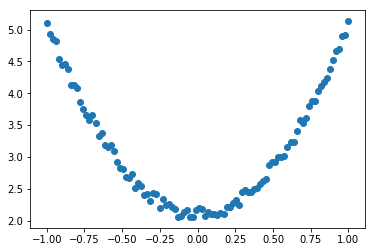

In [7]:
# 画图
plt.scatter(x, y)
plt.show()

（4）初始化权重参数

In [8]:
# 随机初始化参数
w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1) 

（5）训练模型
定义损失函数，假设批量大小为100：
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/2e4ba2ba407b80439b5888d310093c18.png)

In [9]:
# 代码实现
lr =0.001 # 学习率
 
for i in range(800):
    # 前向传播
    y_pred = np.power(x,2)*w1 + b1
    # 定义损失函数
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    #计算梯度
    grad_w=np.sum((y_pred - y)*np.power(x,2))
    grad_b=np.sum((y_pred - y))
    #使用梯度下降法，是loss最小
    w1 -= lr * grad_w
    b1 -= lr * grad_b

（6）可视化结果

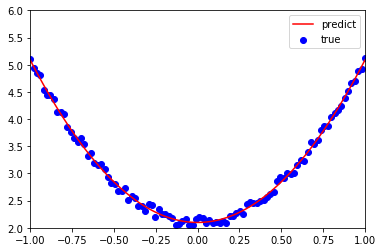

[[2.98927619]] [[2.09818307]]


In [10]:
plt.plot(x, y_pred,'r-',label='predict')
plt.scatter(x, y,color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()
print(w1,b1)# 打印w，b的值

## 使用Tensor及antograd实现机器学习
上一节可以说是纯手工完成一个机器学习任务，数据用Numpy表示，梯度及学习是自己定义并构建学习模型。这种方法适合于比较简单的情况，如果稍微复杂一些，代码量将几何级增加。是否有更方便的方法呢？这节我们将使用Pytorch的自动求导的一个包antograd，利用这个包及对应的Tensor，便可利用自动反向传播来求梯度，无需手工计算梯度。以下是具体实现代码。

（1）导入需要的库

In [11]:
import torch as t
%matplotlib inline
 
from matplotlib import pyplot as plt

（2）生成训练数据，并可视化数据分布情况

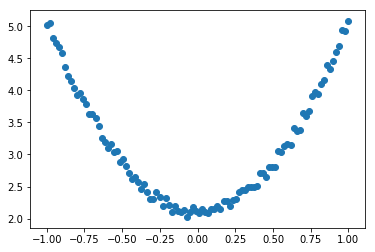

In [12]:
t.manual_seed(100) 
dtype = t.float
#生成x坐标数据，x为tenor，需要把x的形状转换为100x1
x = t.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
#生成y坐标数据，y为tenor，形状为100x1，另加上一些噪音
y = 3*x.pow(2) +2+ 0.2*torch.rand(x.size())                 
 
# 画图，把tensor数据转换为numpy数据
plt.scatter(x.numpy(), y.numpy())
plt.show()

（3）初始化权重参数

In [13]:
# 随机初始化参数，参数w，b为需要学习的，故需requires_grad=True
w = t.randn(1,1, dtype=dtype,requires_grad=True)
b = t.zeros(1,1, dtype=dtype, requires_grad=True) 

（4） 训练模型

In [14]:
lr =0.001 # 学习率
 
for ii in range(800):
    # 前向传播，并定义损失函数loss
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    # 自动计算梯度，梯度存放在grad属性中
    loss.backward()
    
    # 手动更新参数，需要用torch.no_grad()，使上下文环境中切断自动求导的计算
    with t.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    
    # 梯度清零
        w.grad.zero_()
        b.grad.zero_()

（5）可视化显示

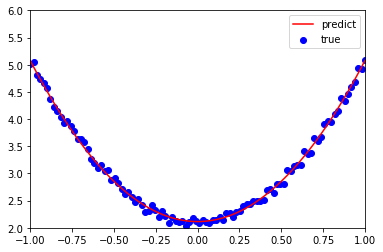

tensor([[2.9645]], requires_grad=True) tensor([[2.1146]], requires_grad=True)


In [15]:
plt.plot(x.numpy(), y_pred.detach().numpy(),'r-',label='predict')#predict
plt.scatter(x.numpy(), y.numpy(),color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()
        
print(w, b)

## 使用TensorFlow架构
上一节用Pytorch的autograd及Tensor实现了这个任务。这节我们用深度学习的另一个框架TensorFlow实现该回归分析任务，大家可比较一下，使用不同架构之间的一些区别。为便于比较，这里使用TensorFlow的静态图（TensorFlow2.0 新增核心功能Eager Execution，并把Eager Execution变为 TensorFlow 默认的执行模式。这意味着 TensorFlow 如同 PyTorch 那样，由编写静态计算图全面转向了动态计算图）。

（1）导入需要的库

In [16]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
 
#生成训练数据
np.random.seed(100) 
x = np.linspace(-1, 1, 100).reshape(100,1) 
y = 3*np.power(x, 2) +2+ 0.2*np.random.rand(x.size).reshape(100,1)  

（2）初始化参数

In [17]:
# 创建两个占位符，分别用来存放输入数据x和目标值y
#运行计算图时，导入数据.
x1 = tf.placeholder(tf.float32, shape=(None, 1))
y1 = tf.placeholder(tf.float32, shape=(None, 1))
 
# 创建权重变量w和b，并用随机值初始化.
# TensorFlow 的变量在整个计算图保存其值.
w = tf.Variable(tf.random_uniform([1], 0, 1.0))
b = tf.Variable(tf.zeros([1]))

（3）实现前向传播及损失函数

In [18]:
# 前向传播，计算预测值.
y_pred = np.power(x,2)*w + b
 
# 计算损失值
loss=tf.reduce_mean(tf.square(y-y_pred)) 
 
# 计算有关参数w、b关于损失函数的梯度.
grad_w, grad_b = tf.gradients(loss, [w, b])
 
#用梯度下降法更新参数. 
# 执行计算图时给 new_w1 和new_w2 赋值
# 对TensorFlow 来说，更新参数是计算图的一部分内容
# 而PyTorch，这部分是属于计算图之外.
learning_rate = 0.01
new_w = w.assign(w - learning_rate * grad_w)
new_b = b.assign(b - learning_rate * grad_b)

（4）训练模型

In [19]:
# 已构建计算图, 接下来创建TensorFlow session，准备执行计算图.
with tf.Session() as sess:
    # 执行之前需要初始化变量w、b
    sess.run(tf.global_variables_initializer())
 
 
    for step in range(2000):
        # 循环执行计算图. 每次需要把x1,y1赋给x和y.
        # 每次执行计算图时，需要计算关于new_w和new_b的损失值,
        # 返回numpy多维数组
        loss_value, v_w, v_b = sess.run([loss, new_w, new_b],
                                    feed_dict={x1: x, y1: y})
        if  step%200==0:  #每200次打印一次训练结果
            print("损失值、权重、偏移量分别为{:.4f},{},{}".format(loss_value,v_w,v_b))


损失值、权重、偏移量分别为8.3873,[0.88361335],[0.05644109]
损失值、权重、偏移量分别为0.0728,[2.1262996],[2.388259]
损失值、权重、偏移量分别为0.0389,[2.3755665],[2.3252509]
损失值、权重、偏移量分别为0.0217,[2.5482006],[2.2615983]
损失值、权重、偏移量分别为0.0129,[2.6723857],[2.2155912]
损失值、权重、偏移量分别为0.0083,[2.761768],[2.182473]
损失值、权重、偏移量分别为0.0059,[2.8261025],[2.1586385]
损失值、权重、偏移量分别为0.0047,[2.8724084],[2.1414826]
损失值、权重、偏移量分别为0.0040,[2.9057407],[2.129134]
损失值、权重、偏移量分别为0.0037,[2.9297287],[2.1202452]


（5）可视化操作

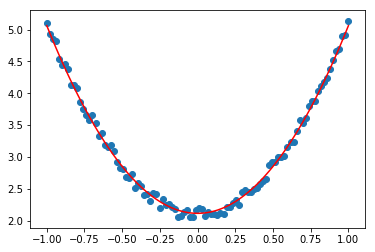

In [21]:
# 可视化结果            
plt.figure() 
plt.scatter(x,y)
plt.plot (x, v_b + v_w*x**2,'r')

TensorFlow使用静态图，其特点是先构造图形(如果不显式说明，TensorFlow会自动构建一个缺省图形)，然后启动session，开始执行相关程序，这个时候程序才开始运行，前面都是铺垫，所以也没有运行结果。而Pytorch的动态图，动态最关键一点就是它是交互式的，而且执行每个命令马上就可看到结果，这对训练、发现问题、纠正问题非常方便，其构图是一个叠加过程或动态过程，期间我们可以随时添加内容。这些特征对于训练和调式过程无疑是非常有帮助的，这或许也是Pytorch为何在高校、科研院所深得大家喜爱的重要原因。

## 课后感悟

这是我第一次比较系统的了解机器学习的整个过程，这个本书讲的比较详细，对tensor的操作也了解了比较多，对使用pytorch进行机器学习的兴趣也有提升，终于找到了一定的门路

对最后几个例子的比较感觉：pytorch实现模型相对比较简单，便于理解，只是可能刚刚开始时候，觉得tensor的操作还不是特别明朗，继续加油